<a href="https://colab.research.google.com/github/iRahulPandey/medium-articles/blob/master/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

The notebook shows various ways of visualizing amazing data
- Matplotlib
- Seaborn
- Plotly Express
- bqplot
- altair
- bokeh

## Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date, datetime, timedelta

## Get Data

In [2]:
# get the previous day to fetch data from for latest data and us_medical_data
today = date.today()
latest_data = today-timedelta(days = 1)

# generate url
latest_data_url = 'https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+latest_data.strftime("%m-%d-%Y")+'.csv'
us_medical_data_url = 'https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'+latest_data.strftime("%m-%d-%Y")+'.csv'

In [3]:
# Get data from Center for Systems Science and Engineering (CSSE)
# https://github.com/CSSEGISandData/COVID-19
# confirmed cases
confirmed_cases = pd.read_csv('https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
# recoveries
recoveries= pd.read_csv('https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
# deaths
deaths = pd.read_csv('https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# current data
latest_data = pd.read_csv(latest_data_url)
# us medical data
us_medical_data = pd.read_csv(us_medical_data_url)
# vaccination manufacturer
vaccine_manufacturer = pd.read_csv('https://raw.github.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv')
# vaccination manufacturer
vaccine = pd.read_csv('https://raw.github.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')

In [4]:
# show confirmed data
confirmed_cases.head(n=2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095


## Missing Data

In [5]:
# missing data without visualization in percentage
confirmed_cases.isnull().sum()/len(confirmed_cases)*100

Province/State    68.727273
Country/Region     0.000000
Lat                0.727273
Long               0.727273
1/22/20            0.000000
                    ...    
5/15/21            0.000000
5/16/21            0.000000
5/17/21            0.000000
5/18/21            0.000000
5/19/21            0.000000
Length: 488, dtype: float64

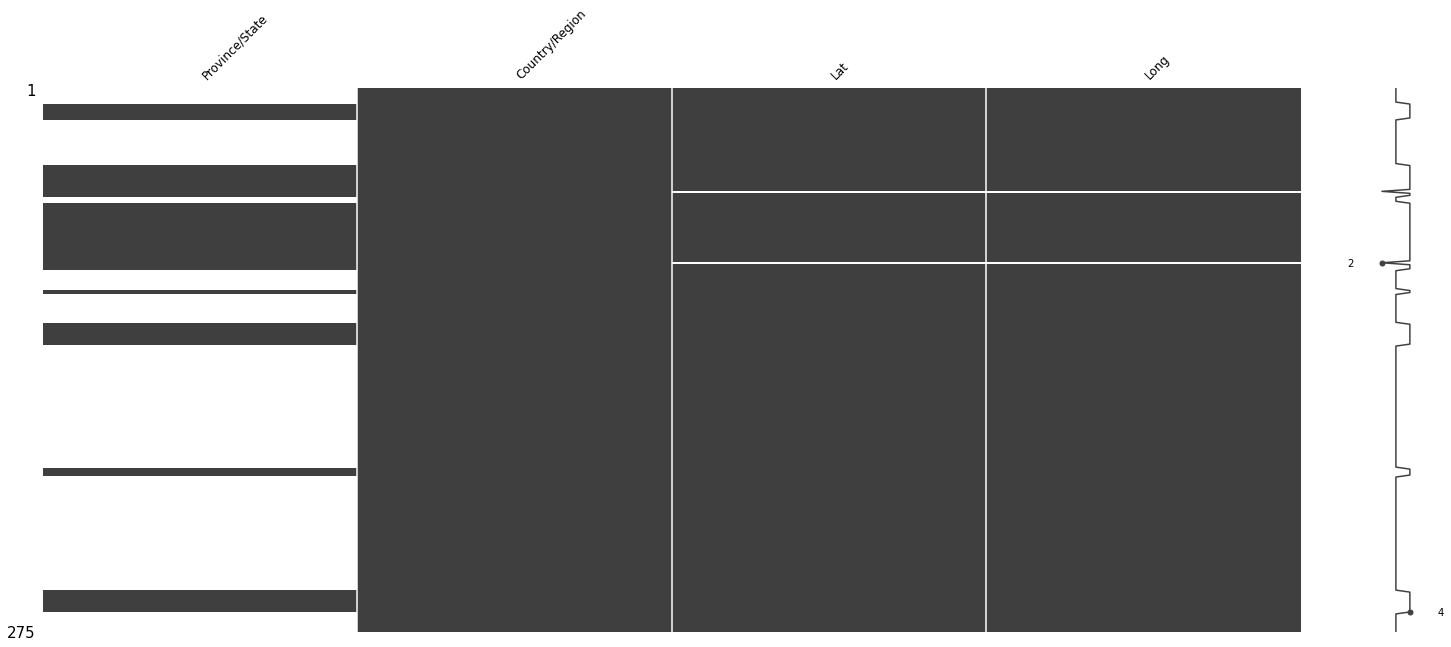

In [6]:
# list for visualization
columns = ['Province/State','Country/Region','Lat','Long']

# visualize missing data
msno.matrix(confirmed_cases[columns], fontsize=12);

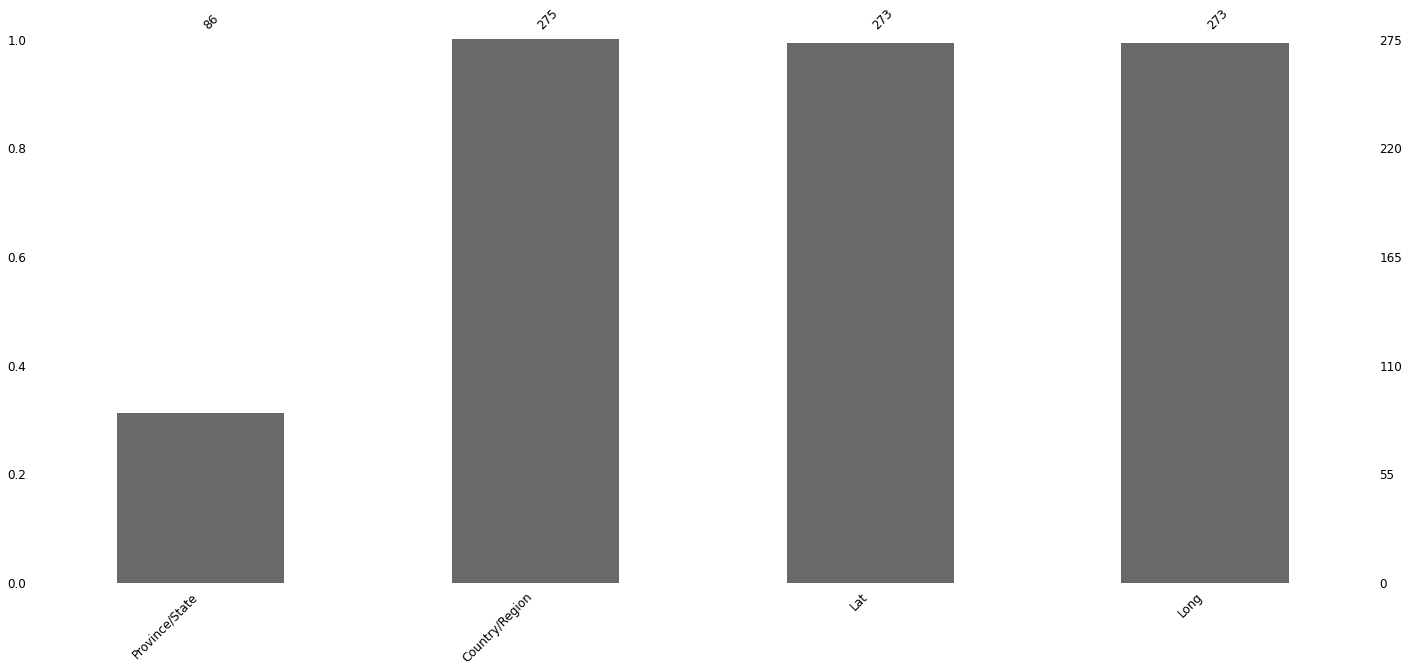

In [7]:
# visualize histogram 
msno.bar(confirmed_cases[columns], fontsize=12);

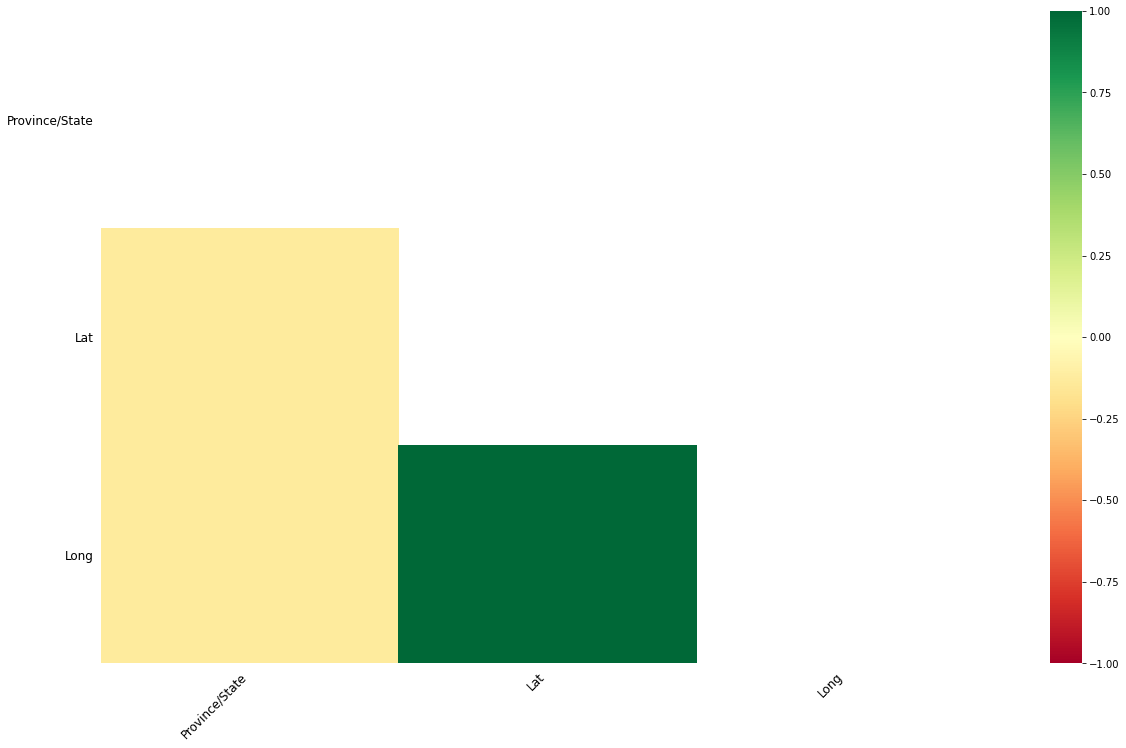

In [8]:
msno.heatmap(confirmed_cases[columns], fontsize=12, cmap="RdYlGn",labels=False);

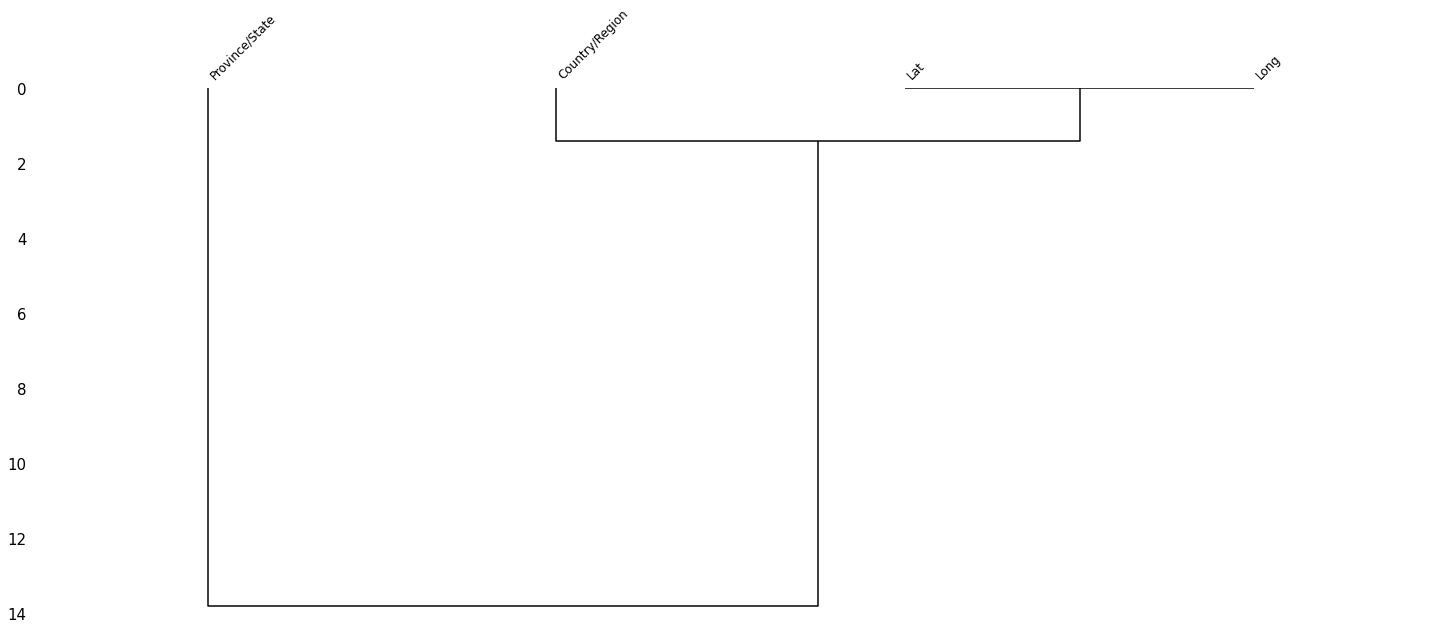

In [10]:
msno.dendrogram(confirmed_cases[columns], fontsize=12);

## Data Transformation

#### Merge Data

In [11]:
# melt data
melted_confirmed_df = confirmed_cases.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
        var_name=['Date'], 
        value_name='Confirmed_Cases')

melted_deaths_df = deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
        var_name=['Date'], 
        value_name='Deaths')

In [12]:
# get columns data
dates_columns = confirmed_cases.columns[4:]

# recovery data
melted_recoveries_df = recoveries.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                              value_vars=dates_columns, 
                              var_name='Date',
                              value_name='Recovered')

# format date
melted_recoveries_df['Date'] = pd.to_datetime(melted_recoveries_df['Date'])

# fill nan
melted_recoveries_df.fillna(0, inplace=True)

In [13]:
# combine two dataframe
df_combined = pd.concat([melted_confirmed_df, melted_deaths_df["Deaths"]], axis = 1, sort = False)

# format date
df_combined['Date'] = pd.to_datetime(df_combined['Date'])

# fill nan
df_combined.fillna(0, inplace=True)

In [14]:
# global daily data
df_global_daily = pd.DataFrame(df_combined[['Confirmed_Cases','Deaths','Date']].groupby('Date').sum()).sort_index()

In [15]:
# global daily recovery
df_global_recovery_daily = pd.DataFrame(melted_recoveries_df[['Recovered', 'Date']].groupby('Date').sum()).sort_index()

In [16]:
# countries daily data
df_countries_daily = pd.DataFrame(df_combined[['Confirmed_Cases','Deaths','Date','Country/Region']].groupby(['Date','Country/Region']).sum()).sort_index()

In [17]:
# countries daily recovery data
df_countries_recovery_daily = pd.DataFrame(melted_recoveries_df[['Recovered','Date','Country/Region']].groupby(['Date','Country/Region']).sum()).sort_index()

#### Latest data

In [18]:
# columns to use
latest_data_columns = ['Province_State',	'Country_Region', 'Lat', 'Long_', 'Confirmed',	'Deaths',	'Recovered',	'Active',	'Incident_Rate',	'Case_Fatality_Ratio']

# latest data
df_latest_data = latest_data[latest_data_columns]

# group by country
df_countries_latest= pd.DataFrame(df_latest_data[['Country_Region', 'Confirmed',	'Deaths',	'Recovered',	'Active',	'Incident_Rate']].groupby(['Country_Region']).sum()).sort_index()

#### Global Daily Data

In [19]:
# merging global daily
df_global_merged = pd.concat([df_global_daily, df_global_recovery_daily["Recovered"]], axis = 1, sort = False)

#### Global Daily Data based on countries

In [20]:
# merging countries daily
df_countries_merged = pd.concat([df_countries_daily, df_countries_recovery_daily["Recovered"]], axis = 1, sort = False)

#### Daily Vaccination

In [21]:
# columns to use
vaccine_data_columns = ['location',	'date', 'daily_vaccinations']

# vaccine data
df_vaccine_data = vaccine[vaccine_data_columns].copy()

# format date
df_vaccine_data['date'] = pd.to_datetime(df_vaccine_data['date'])

# fill nan
df_vaccine_data.fillna(0, inplace=True)

In [57]:
# total vaccination by country
df_total_vaccine_location = pd.DataFrame(df_vaccine_data[['location',	'daily_vaccinations']].groupby(['location']).sum()).sort_index()

### Vaccine Provider

In [23]:
# copy data
df_vaccine_manufacturer =  vaccine_manufacturer.copy()

# format date
df_vaccine_manufacturer['date'] = pd.to_datetime(df_vaccine_manufacturer['date'])

# fill nan
df_vaccine_manufacturer.fillna(0, inplace=True)

In [31]:
# daily vaccination by location
df_vaccine_location_manufacturer = pd.DataFrame(df_vaccine_manufacturer[['location',	'vaccine',	'total_vaccinations']].groupby(['location',	'vaccine']).max()).sort_index()

In [45]:
# vaccine by location
df_vaccine_location = pd.DataFrame(df_vaccine_manufacturer[df_vaccine_manufacturer['date'] == df_vaccine_manufacturer['date'].max()][['location',	'total_vaccinations']].groupby(['location']).sum()).sort_index()